# Logistic Regression


## The Artificial Neuron


Let's dive into the heart of the matter: the artificial neuron!

The figure below shows how an artificial neuron works:

![Artificial Neuron](./images/NeuroneArtificiel.png)

An artificial neuron takes a vector $\mathbf{x}=(x_1,x_2,...,x_n)$ as input. Each element $x_i$ of the vector $\mathbf{x}$ is multiplied by a weight $w_i$, then the sum is calculated and a bias $b$ is added. This sum is then passed through a function called the **activation function** $\phi$.
$Output = \phi(\sum_{i=0}^{n} w_i x_i  + b)$
This process is called an artificial neuron because it is inspired by the functioning of a [biological neuron](https://en.wikipedia.org/wiki/Artificial_neuron).


## Activation Functions


**Heaviside Function:** Originally, the first artificial neuron ([the perceptron](https://fr.wikipedia.org/wiki/Perceptron)) used a threshold function as the activation function. This allows making a decision (0 or 1) based on the weighted sum and a defined threshold.
$heaviside(x) = \left\{
    \begin{array}{ll}
        1 & \text{if } x > 0 \\
        0 & \text{otherwise}
    \end{array}
\right. \text{with } x=\sum_{i=0}^{n} w_i x_i  + b$
This activation function is effective for binary classification, but it does not work for multiple classes. Additionally, the function is not differentiable, which complicates the use of the gradient descent algorithm to optimize the neuron's weights $w_i$.

Recent activation functions are much more interesting for training neural networks using gradient descent. First, they are differentiable, allowing the application of our gradient descent algorithm. Second, they are nonlinear, enabling networks to learn complex representations. There are also other specific advantages to each activation function.

One of the "recent" activation functions is the sigmoid function, which we detail here:

**Sigmoid Function:** Another particularly interesting activation function due to its analogy with probability is the sigmoid function. This time, the function allows obtaining a value between 0 and 1 using the formula:
$sigmoid(x) = \frac{1}{1 + e^{-x}} \text{ with } x=\sum_{i=0}^{n} w_i x_i  + b$


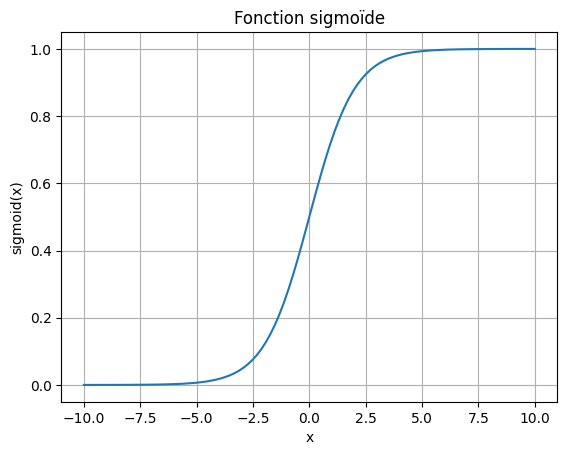

In [1]:
# Tracé de la fonction sigmoïde
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))
x = np.linspace(-10, 10, 100)
y = sigmoid(x)

plt.plot(x, y)
plt.title('Fonction sigmoïde')
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.grid(True)
plt.show()

This function is differentiable, and its derivative is:
$sigmoid'(x) = sigmoid(x) \cdot (1 - f(x))$
Therefore, we can apply gradient descent to our artificial neuron when using this activation function.

There are many other [activation functions](https://fr.wikipedia.org/wiki/Fonction_d%27activation) each with their own uses. We will see them in the following courses. ($Tanh$, $ReLU$, $Softmax$)


## Application


To fully understand logistic regression, nothing beats a concrete example.

In this example, we will determine whether a student will be admitted to their dream university based on three pieces of information: their entrance exam score, their average grades from the previous year, and the quality of their motivation letter.

We do not know the calculation method for admitting or rejecting a student, but we have the data and corresponding decisions.

The input information ranges from 0 to 1, with 1 indicating the best score. Admitted = 1 corresponds to admission, while Admitted = 0 corresponds to rejection.


In [2]:
from tabulate import tabulate

# Définition des données d'entraînement
values_train = [[0.7, 0.8, 0.1], [0.4, 0.9, 0.5], [0.2, 0.3, 0.9], [0.9, 0.9, 0.6]]
labels_train = [1, 0, 0, 1]

# Ajout des noms de colonnes
data = [['Examen', 'Moyenne', 'Motivation', 'Admis']]
data.extend([[values_train[i][0], values_train[i][1], values_train[i][2], labels_train[i]] for i in range(len(values_train))])

# Affichage du tableau
print(tabulate(data, headers="firstrow", tablefmt="fancy_grid"))

╒══════════╤═══════════╤══════════════╤═════════╕
│   Examen │   Moyenne │   Motivation │   Admis │
╞══════════╪═══════════╪══════════════╪═════════╡
│      0.7 │       0.8 │          0.1 │       1 │
├──────────┼───────────┼──────────────┼─────────┤
│      0.4 │       0.9 │          0.5 │       0 │
├──────────┼───────────┼──────────────┼─────────┤
│      0.2 │       0.3 │          0.9 │       0 │
├──────────┼───────────┼──────────────┼─────────┤
│      0.9 │       0.9 │          0.6 │       1 │
╘══════════╧═══════════╧══════════════╧═════════╛


Our goal in this problem is to determine whether students with the scores $[Exam=0.8, Average=0.7, Motivation=0.2]$ and $[Exam=0.4, Average=0.5, Motivation=0.9]$ were admitted.


You've understood that the data $Exam$, $Average$, and $Motivation$ correspond to our $x_i$. Our goal with logistic regression is to find an optimal value for the $w_i$ that aligns with our training data.

For simplicity, let's define $x_0=Exam$, $x_1=Average$, $x_2=Motivation$, and $y_{true}=Admitted$.


### Cost Function


In our gradient descent example, our goal was to find the minimum of a function. These are the scenarios where gradient descent excels. For our new problem, we need to find a function that, when minimized, improves predictions.

In our binary classification, $y_{true}$ is 1 if the student is admitted and 0 otherwise.

Our goal is to predict whether the student is admitted or not by predicting the output $pred$.

During training, we want to train our logistic regression model to predict $pred \approx y_{true}$.

To do this, we use the negative likelihood function, which is expressed as follows:
$\text{loss} = - \left( y_{\text{true}} \cdot \log(\text{pred}) + (1 - y_{\text{true}}) \cdot \log(1 - \text{pred}) \right)$

For more details on logistic regression and negative likelihood loss, you can consult this [link](https://blog.demir.io/understanding-logistic-regression-26802c0da856).


The important thing is to understand how this function varies based on our prediction $pred$ and the label $y_{true}$.

For this, let's consider the case where the label is $y_{true}=1$. Let's analyze two scenarios:

If $pred=0.9$, meaning our model predicts a 90% chance of admission (a good prediction), then:
$\text{loss} = - \left( 1.0 \cdot \log(0.9) + (1 - 1.0) \cdot \log(1 - 0.9) \right)$
$\text{loss} = - \left( 1.0 \cdot \log(0.9) + 0 \cdot \log(1 - 0.9) \right)$
$\text{loss} = - \left( 1.0 \cdot \log(0.9)\right)$
$\text{loss} = - \left( 1.0 \cdot \log(0.9)\right)$
$\text{loss} = 0.046$
The loss is low, which is good because the prediction is accurate.

If $pred=0.2$, meaning our model predicts a 20% chance of admission (a bad prediction), then:
$\text{loss} = - \left( 1.0 \cdot \log(0.2) + (1 - 1.0) \cdot \log(1 - 0.2) \right)$
$\text{loss} = - \left( 1.0 \cdot \log(0.2) + 0 \cdot \log(1 - 0.2) \right)$
$\text{loss} = - \left( 1.0 \cdot \log(0.2)\right)$
$\text{loss} = - \left( 1.0 \cdot \log(0.2)\right)$
$\text{loss} = 0.70$
The loss is high, which is good because the prediction is poor.

For a case where $y_{true}=0$, we find a low loss when $pred$ is close to 0 and a high loss when $pred$ is close to 1 (you can do the calculation to practice if needed).


### Calculating Derivatives


Now that we have a function to minimize, it is necessary to calculate the derivative of this function with respect to each of the weights $w_0$, $w_1$, $w_2$, and $b$.

We must therefore calculate $\frac{\partial loss}{\partial w_0}$, $\frac{\partial loss}{\partial w_1}$, $\frac{\partial loss}{\partial w_2}$, and $\frac{\partial loss}{\partial b}$.

For the weights $w_0$, $w_1$, and $w_2$, the derivative is calculated in the same way.

Using the chain rule, for $w_0$, we have:
$\frac{\partial loss}{\partial w_0} = \frac{\partial loss}{\partial pred} \cdot \frac{\partial pred}{\partial w_0}$

As a reminder, our prediction $pred$ corresponds to the output of our logistic regression with the activation function $sigmoid$.

For the first term, the derivative of the loss with respect to $pred$ gives:
$\frac{\partial loss}{\partial pred} = -(\frac{y_{true}}{pred} - \frac{1-y_{true}}{1-pred}) $
The calculation will not be detailed here, but you can do it yourself to verify.

For the second term, the derivative of $pred$ with respect to $w_0$ gives:
$\frac{\partial pred}{\partial w_0} = pred \cdot (1-pred) \cdot x_0$

Combining the two terms, we get:
$\frac{\partial loss}{\partial w_0} =-(\frac{y_{true}}{pred} - \frac{1-y_{true}}{1-pred}) \cdot pred \cdot (1-pred) \cdot x_0$

And after simplification (magically),
$\frac{\partial loss}{\partial w_0} = (pred-y_{true}) \cdot x_0$

Without detailing the calculation, we also get:
$\frac{\partial loss}{\partial b} = pred-y_{true}$


### Logistic Regression


Now that we have all the elements,
let's define our logistic regression function in Python:


In [3]:
# Notre classe de regression logistique
class logistic_regression():
  def __init__(self) -> None:
    self.w0=np.random.randn()
    self.w1=np.random.randn()
    self.w2=np.random.randn()
    self.b=0
  def __call__(self,x0,x1,x2):
    # Somme pondérée et ajout du biais
    pond=self.w0*x0+self.w1*x1+self.w2*x2+self.b
    # Application de la sigmoïde
    pred=sigmoid(pond)
    return pred
    
def loss(y_true, y_pred):
  # Calcul du loss (log vraisemblance négative)
  loss = - (y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
  return loss
    

def update_weights(model,pred, x0, x1, x2, y_true, learning_rate):
       
  # On calcule les dérivées en fonction des poids et du biais 
  dL_dw0 = (pred - y_true) * x0
  dL_dw1 = (pred - y_true) * x1
  dL_dw2 = (pred - y_true) * x2
  dL_db = pred - y_true
      
  # On modifie les paramètres pour réduire le loss 
  # La modification des poids dépend du learning rate, du signe de la dérivée et de la valeur de la dérivée
  model.w0 -= learning_rate * dL_dw0
  model.w1 -= learning_rate * dL_dw1
  model.w2 -= learning_rate * dL_dw2
  model.b -= learning_rate * dL_db

In [4]:

# Initialisation du modèle et des hyperparamètres
learning_rate = 0.01
epochs = 1000 # le nombre d'itérations d'entrainement
model = logistic_regression()

Before training the model, let's test our predictions on the two students whose admission results we want to know.


In [5]:
values_test=[[0.8,0.7,0.7],[0.4,0.5,0.9]]
for value in values_test:
  x0,x1,x2=value
  pred = model(x0, x1, x2)
  print("L'élève avec Examen = "+str(x0)+ ", Moyenne = "+str(x1)+" et Motivation = "+str(x2)+ " a "+str(round(pred*100)) + "% de chance d'être admis")

L'élève avec Examen = 0.8, Moyenne = 0.7 et Motivation = 0.7 a 60% de chance d'être admis
L'élève avec Examen = 0.4, Moyenne = 0.5 et Motivation = 0.9 a 59% de chance d'être admis


We can see that the model is very uncertain and gives random probabilities, which is logical since its weights are initialized randomly.

Now, let's train the model on our training data.


In [9]:
# Entraînement
for epoch in range(epochs):
  # Mise à jour des poids pour chaque exemple
  total_loss = 0
  for (x0, x1, x2), y_true in zip(values_train, labels_train):
    pred = model(x0, x1, x2)
    update_weights(model,pred, x0, x1, x2, y_true, learning_rate)
    total_loss += loss(y_true, pred)

  avg_loss = total_loss / len(labels_train)
  
  # Affichage de la perte pour suivre la progression de l'entraînement
  if ((epoch + 1) % 5000 == 0) or (epoch==0):
    print(f"Epoch {epoch + 1}/{epochs}, Loss: {avg_loss}")

Epoch 1/40000, Loss: 0.01468091027998586
Epoch 5000/40000, Loss: 0.013032955086147595
Epoch 10000/40000, Loss: 0.011715352279809266
Epoch 15000/40000, Loss: 0.010638348324912276
Epoch 20000/40000, Loss: 0.009741762611763436
Epoch 25000/40000, Loss: 0.008983896958517028
Epoch 30000/40000, Loss: 0.008334957514714105
Epoch 35000/40000, Loss: 0.007773096000082178
Epoch 40000/40000, Loss: 0.007281930357182074


In [10]:
print(model.w0, model.w1, model.w2, model.b)

for value in values_test:
  x0,x1,x2=value
  pred = model(x0, x1, x2)
  print("L'élève avec Examen = "+str(x0)+ ", Moyenne = "+str(x1)+" et Motivation = "+str(x2)+ " a "+str(round(pred*100)) + "% de chance d'être admis")

19.464301071981186 -3.27230109363944 -8.244865180820856 -4.903197398150705
L'élève avec Examen = 0.8, Moyenne = 0.7 et Motivation = 0.7 a 93% de chance d'être admis
L'élève avec Examen = 0.4, Moyenne = 0.5 et Motivation = 0.9 a 0% de chance d'être admis


As we can see, our model is now much more confident in its predictions and gives us predictions consistent with the training data.
